<a href="https://colab.research.google.com/github/RAJAS-KAR/ML_GUVI_Task7/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Social_Network_Ads.csv

**Importing the libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [20]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
df = df.drop(["User ID"], axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [23]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [27]:
x = df.drop(['Purchased'], axis = 1)
y = df["Purchased"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(n_estimators = 100, max_depth = 2, max_features = 'sqrt')
rf_cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

**Predicting the Test set results**

In [31]:
y_pred = rf_cls.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [39]:
from sklearn.metrics import confusion_matrix,  roc_curve, roc_auc_score, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))

[[62  8]
 [ 7 43]]


In [40]:
print(f1_score(y_test, y_pred))

0.8514851485148515


**Visualising the Training set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


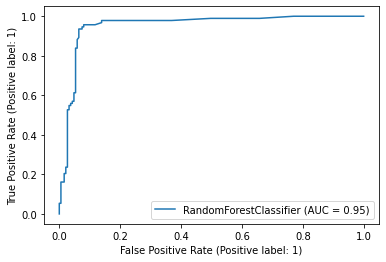

In [44]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
plot_roc_curve(rf_cls, x_train, y_train)

**Visualising the Test set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


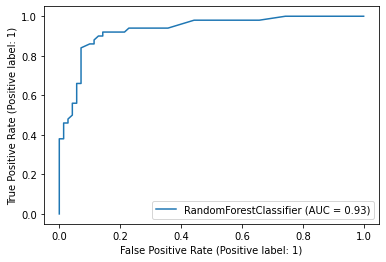

In [45]:
plot_roc_curve(rf_cls, x_test, y_test)